# Description of the Project:
This is a horticulture prediction game. This project will be used in practice to predict cropping times of different horticultural products. It will also be used to make sure that weather is good enough for harvesting quality products and serving "pick your own" customers. That means: if raining soon, we want to encourage customers to come and visit earlier or then later given the date and time of possible rain.

### Target:

Calculating the starting date of the  growing season.
Calculating accumulated temperatures starting from the starting date of the growing season.  


# Story of data:
### Data collection
The data collected, is about the different parameters of weather of each hour from 28/05/2020 to 27/08/2020 from Tornio Torpi and Rovaniemi stations on this <a href="https://en.ilmatieteenlaitos.fi/download-observations" >link</a>.

Collecting daily data using a python code from  <a href="https://openweathermap.org/?fbclid=IwAR1OfAHqpAnJNK3_4n97yX1FQyH9G_s-6NAwTqUeiaeA4-QzOOKb2xSNDO0" >this website</a>.

<a href="#2.-Collecting-data-from-website"> python code </a>

# Headings of the columns:


### Precepitation (mm):

1 mm of precipitation equals one liter of water per square meter.

#### Note:
-1 in this column, is not a number but it is an indication, at each case where there is -1 it means there will be no rain in this day.

### Air temperature (degC): 
the ambient temperature in Celcius.

### Max and min temperature: 
It's the interval of temperature during the day, the minimum and the maximum temperature that can be reached by day.

### Diffuse radiation:
Radiation that reaches a surface or detector from all directions. Generally applied to the portion of solar radiation that reaches the surface after scattering by the aerosols and molecules in the atmosphere. <a href="https://www.oxfordreference.com/view/10.1093/oi/authority.20110803095717904" >link 2</a>

### Reflected radiation:
Reflected Radiation is that portion of the total radiation which has been reflected from the Earth's surface and received on a flat, horizontally-mounted, downward-faced thermopile surface. <a href="https://www.sciencedirect.com/topics/engineering/reflected-radiation#:~:text=Reflected%20Radiation%20is%20that%20portion,%2C%20downward%2Dfaced%20thermopile%20surface." >link 3</a>

### Sunshine duration: 
Sunshine duration is the length of time that the ground surface is irradiated by direct solar radiation. <a href="https://link.springer.com/chapter/10.1007/978-3-319-69185-5_6" >link 4</a>

#### Note:
not all the stations in Finland do observations for radiation, so we chose the closest station Tornio (Rovaniemi) from 27/05/2020 to 30/05/2020. The data observation is per hour for diffuse radiation, reflected radiation and sunshine duration.
### Calculated parameters:
### Starting date: 
It is the date where the growing season starts, we calculate it by calculating the mean temperature of each day (mean= (max temp + min temp)/2). The first 10 days that have the mean >5 is the starting of the season.
### accumulated temperatures: 
From the starting date, we take the first mean of temperature as an initial value, and we keep adding the next day's mean.


You can see the code <a href="#1.-starting-date-and-accumulated-temp"> here </a>

### Visualisation:
Visualising the accumulated temperature of the first 10 days from starting season. <a href="#4.-Visualisation"> see here </a>

# Preprossesing data:
### Precipitation amount (mm): 
In this  column we have some cases that we have the precepitation amount is -1 which means that there is no rain in this day, in order to fix that we made a python code that replaces every -1 in this column by "no rain"
### snow depth:
In this  column we have some cases that we have the snow depth is -1 which means that there is no rain in this day, in order to fix that we made a python code that replaces every -1 in this column by "no snow".

Code is here <a href="#3.-Snow-and-Precipitation"> here </a>

### radiation:
for the radiation, sunshine duration and reflected radiation, we could not get daily observations, only instantaneaous observations (per hour). We decided to stock these data in an other excel file that could be read directly from jupyter.

 ## 1. starting date and accumulated temp 
 [<a href="#Story-of-data:">Back</a>]

In [44]:
from openpyxl import load_workbook

lista = []
list2 =[]
list3 =[]

def mean():
    workbook = load_workbook(filename="Hgr.xlsx")
    sheet = workbook.active
    line = 2
    rowmax = sheet.max_row
    while line < rowmax and sheet.cell(row=line, column=10).value is not None:
        mean1 = (float(sheet.cell(row=line, column=10).value) + float(sheet.cell(row=line, column=11).value))/2
        lista.append(mean1)
        line = line + 1

def starting_date():
    counting =0
    workbook = load_workbook(filename="Hgr.xlsx")
    sheet = workbook.active
    line = 2

    rowmax = sheet.max_row
    while line < rowmax and sheet.cell(row=line, column=10).value is not None:
        mean1 = (sheet.cell(row=line, column=10).value + sheet.cell(row=line, column=11).value) / 2
        if mean1 >= 5:
            list2.append(lista[line-2])
            counting = counting + 1
            if counting >= 10:
                day = str(sheet.cell(row=line-9, column=1).value) + "/" + str(sheet.cell(row=line-9, column=2).value) + "/" + str(sheet.cell(row=line-9, column=3).value)
                return day
        else:
            counting = 0
            list2.clear()
        line = line +1

def cumulation():
    cml=0
    for i in list2:
        cml = cml+i
        list3.append(cml)
    return list3

if __name__ == '__main__':
    mean()
    print("starting_date ==> "+starting_date())
    print("10 tempurature ==> "+str(list2))
y=[17,18,19,20,21,22,23,24,25,26]

starting_date ==> 2020/5/17
10 tempurature ==> [5.1499999999999995, 5.8999999999999995, 5.45, 5.75, 6.7, 5.8, 7.2, 10.65, 13.549999999999999, 11.65]


 ## 4. Visualisation
 [<a href="#Description-of-the-Project:">Back</a>]

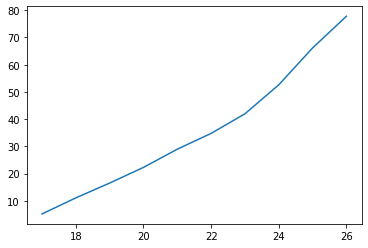

In [42]:
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure()
plt.plot(y,cumulation())

## 2. Collecting data from website
 [<a href="#Story-of-data:">Back</a>]

In [28]:
import requests

url = "http://api.openweathermap.org/data/2.5/weather?q=tornio,+358&appid=83be61b739d4c140c4e639d6510bd018"
json_data = requests.get(url).json()
max = json_data['main']['temp_max']
min = json_data['main']['temp_min']
clouds = json_data['clouds']['all']
humidity = json_data['main']['humidity']
visibility = json_data['visibility']

maxtoc = float(max) - 273.15
mintoc = float(min) -273.15

print("max temp = ",maxtoc)
print("min temp = ",mintoc)
print("clouds = ",clouds)
print("humidity = ",humidity)
print("visibility = ",visibility)

max temp =  -3.0
min temp =  -3.0
clouds =  90
humidity =  100
visibility =  10000


## 3. Snow and Precipitation
 [<a href="#Preprossesing-data:">Back</a>]

In [31]:
import openpyxl



def rain():
    workbook = openpyxl.load_workbook(filename="Hgr.xlsx")
    sheet = workbook.active
    line = 2
    rowmax = sheet.max_row
    while line < rowmax and sheet.cell(row=line, column=10).value is not None and sheet.cell(row=line, column=16).value is None:

        if sheet.cell(row=line, column=6).value == -1:
            sheet.cell(row=line, column=15).value = "no rain"

        else:
            sheet.cell(row=line, column=15).value = sheet.cell(row=line, column=6).value

        line = line + 1

    workbook.save('Hgr.xlsx')


def snow():
    workbook = openpyxl.load_workbook(filename="Hgr.xlsx")
    sheet = workbook.active
    line = 2
    rowmax = sheet.max_row
    while line < rowmax and sheet.cell(row=line, column=10).value is not None and sheet.cell(row=line, column=16).value is None:
        
        if sheet.cell(row=line, column=7).value == -1:
            sheet.cell(row=line, column=16).value = "no snow"

        else:
            sheet.cell(row=line, column=16).value = sheet.cell(row=line, column=7).value

        line = line + 1
    workbook.save('Hgr.xlsx')

if __name__ == '__main__':
    rain()
    snow()



